<h1>يهدف هذا الدفتر إلى تحليل درجة الخطر الذي تتعرض له اللغات المنطوقة في جميع أنحاء العالم</h1>
<a href="https://www.kaggle.com/datasets/the-guardian/extinct-languages">المصدر</a>

In [180]:
!pip install adjustText

<h3>تحميل المكتبات</h2>

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
from adjustText import adjust_text
%matplotlib inline

In [182]:
file=pd.read_csv('/content/data.csv')

In [183]:
file.head()

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...


<h3>التحقق من الاعمدة الفارغة</h3>

In [184]:
file.isnull().any()

,0
ID,False
Name in English,False
Name in French,True
Name in Spanish,True
Countries,True
Country codes alpha 3,True
ISO639-3 codes,True
Degree of endangerment,False
Alternate names,True
Name in the language,True


In [185]:
file = file.drop(['Latitude', 'Longitude', 'Description of the location', 'Country codes alpha 3', 'ISO639-3 codes', 'Name in Spanish', 'Name in French'], axis=1)

<h3>للاعمدة النصية او "0" للاعمدة العددية "None" استبدال القيم الفارغة من كل عمود بإما</h3>

In [186]:
# التحقق من نوع البيانات لكل عمود
file.dtypes

,0
ID,int64
Name in English,object
Countries,object
Degree of endangerment,object
Alternate names,object
Name in the language,object
Number of speakers,float64
Sources,object


In [187]:
file['Countries'].fillna('None',inplace=True)
file['Degree of endangerment'].fillna('None',inplace=True)
file['Alternate names'].fillna('None',inplace=True)
file['Name in the language'].fillna('None',inplace=True)
file['Number of speakers'].fillna(0,inplace=True)
file['Sources'].fillna('None',inplace=True)

In [188]:
file.isnull().any()

,0
ID,False
Name in English,False
Countries,False
Degree of endangerment,False
Alternate names,False
Name in the language,False
Number of speakers,False
Sources,False


<h3>تنظيف البيانات</h3>

In [189]:
file = file.drop(file[(file['Number of speakers']==0)].index)
file = file.drop(file[(file['Countries']=='None')].index)
file = file.drop(file[(file['Degree of endangerment']=='None')].index)

<h3>المعدل الكلي  لكل درجة من درجات خطورة الانقراض </h3>




In [190]:
Vulnerable=len(file.loc[(file['Degree of endangerment']=='Vulnerable')])
Definitely_endangered=len(file.loc[(file['Degree of endangerment']=='Definitely endangered')])
Critically_endangered=len(file.loc[(file['Degree of endangerment']=='Critically endangered')])
Extinct=len(file.loc[(file['Degree of endangerment']=='Extinct')])

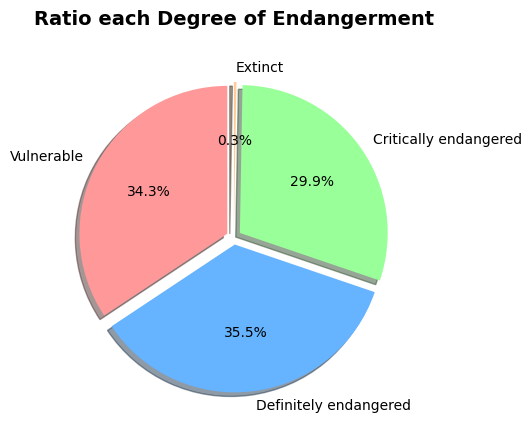

In [191]:
endangered_categories=['Vulnerable','Definitely endangered','Critically endangered','Extinct']
counts=[Vulnerable,Definitely_endangered,Critically_endangered,Extinct]
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode= (0.05, 0.05, 0.05, 0.05)
plt.pie(counts,labels=endangered_categories,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Ratio each Degree of Endangerment',fontweight='bold',fontsize=14,pad=20)
plt.show()

<h3>اعلى الدول لكل درجة خطر</h3>

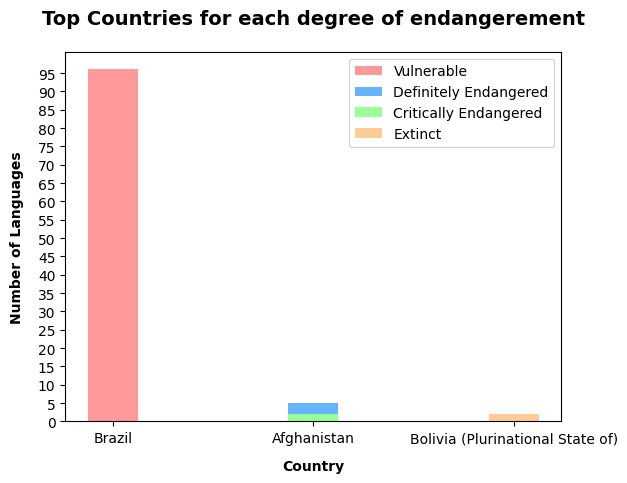

In [192]:
# تجميع البيانات حسب البلد وعد اللغات لكل درجة خطر
Vulnerable_by_country = file[file['Degree of endangerment'] == 'Vulnerable'].groupby('Countries')['Name in English'].count()
Definitely_endangered_by_country = file[file['Degree of endangerment'] == 'Definitely endangered'].groupby('Countries')['Name in English'].count()
Critically_endangered_by_country = file[file['Degree of endangerment'] == 'Critically endangered'].groupby('Countries')['Name in English'].count()
Extinct_by_country = file[file['Degree of endangerment'] == 'Extinct'].groupby('Countries')['Name in English'].count()
# اعلى الدول لكل درجة خطر
top_Vulnerable = Vulnerable_by_country.sort_values(ascending=False).head(1)
top_extinct=Extinct_by_country.sort_values(ascending=False).head(1)
top_Definitely_endangered=Definitely_endangered_by_country.sort_values(ascending=False).head(1)
top_Critically_endangered=Critically_endangered_by_country.sort_values(ascending=False).head(1)

colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels=['Vulnerable','Definitely Endangered','Critically Endangered','Extinct']
plt.bar([top_Vulnerable.index[0],Definitely_endangered_by_country.index[0],
         Critically_endangered_by_country.index[0],Extinct_by_country.index[0]],
          [top_Vulnerable.values[0],Definitely_endangered_by_country.values[0],
          Critically_endangered_by_country.values[0],Extinct_by_country.values[0]],color=colors,label=labels,width=0.25)
plt.xlabel('Country',fontweight='bold',labelpad=10)
plt.ylabel('Number of Languages',fontweight='bold',labelpad=10)
plt.yticks(range(0, 100, 5))
plt.title('Top Countries for each degree of endangerement',fontweight='bold',fontsize=14,pad=20)
plt.legend()
plt.show()


<h3>مقارنة بين اعلى واقل عدد المتحدثين لكل نوع خطورة</h3>

**Vulnerable**

In [193]:
max_vul= file[file['Degree of endangerment'] == 'Vulnerable']['Number of speakers'].max()
min_vul= file[file['Degree of endangerment'] == 'Vulnerable']['Number of speakers'].min()

In [194]:
(file[(file['Degree of endangerment'] == 'Vulnerable') & (file['Number of speakers'] == max_vul)]).loc[:,['Countries','Name in English','Number of speakers']]

,Countries,Name in English,Number of speakers
0,Italy,South Italian,7500000.0


In [195]:
(file[(file['Degree of endangerment'] == 'Vulnerable') & (file['Number of speakers'] == min_vul)]).loc[:,['Countries','Name in English','Number of speakers']]

,Countries,Name in English,Number of speakers
2008,Brazil,Bara (Brazil),21.0




---



**Extinct**

In [196]:
max_extinct= file[file['Degree of endangerment'] == 'Extinct']['Number of speakers'].max()
min_extinct= file[file['Degree of endangerment'] == 'Extinct']['Number of speakers'].min()

In [197]:
(file[(file['Degree of endangerment'] == 'Extinct') & (file['Number of speakers'] == max_extinct)]).loc[:,['Countries','Name in English','Number of speakers']]

,Countries,Name in English,Number of speakers
485,Indonesia,Tobada',12000.0


In [198]:
(file[(file['Degree of endangerment'] == 'Extinct') & (file['Number of speakers'] == min_extinct)]).loc[:,['Countries','Name in English','Number of speakers']]

,Countries,Name in English,Number of speakers
2269,Papua New Guinea,Lae,1.0
2277,Bolivia (Plurinational State of),Uru,1.0




---



**Definitely endangered**

In [199]:
max_def= file[file['Degree of endangerment'] == 'Definitely endangered']['Number of speakers'].max()
min_def= file[file['Degree of endangerment'] == 'Definitely endangered']['Number of speakers'].min()

In [200]:
(file[(file['Degree of endangerment'] == 'Definitely endangered') & (file['Number of speakers'] == max_def)]).loc[:,['Countries','Name in English','Number of speakers']]

,Countries,Name in English,Number of speakers
4,"Italy, Switzerland",Lombard,3500000.0
5,"Albania, Germany, Austria, Belarus, Bosnia and...",Romani,3500000.0


In [201]:
(file[(file['Degree of endangerment'] == 'Definitely endangered') & (file['Number of speakers'] == min_def)]).loc[:,['Countries','Name in English','Number of speakers']]

,Countries,Name in English,Number of speakers
2092,Brazil,Karipuna,10.0




---



**Critically endangered**

In [202]:
max_cri= file[file['Degree of endangerment'] == 'Critically endangered']['Number of speakers'].max()
min_cri= file[file['Degree of endangerment'] == 'Critically endangered']['Number of speakers'].min()

In [203]:
(file[(file['Degree of endangerment'] == 'Critically endangered') & (file['Number of speakers'] == max_cri)]).loc[:,['Countries','Name in English','Number of speakers']]

,Countries,Name in English,Number of speakers
232,India,Parji,51216.0


In [204]:
(file[(file['Degree of endangerment'] == 'Critically endangered') & (file['Number of speakers'] == min_cri)]).loc[:,['Countries','Name in English','Number of speakers']]

,Countries,Name in English,Number of speakers
2262,Brazil,Apiaká,1.0
2263,Cameroon,Bikya,1.0
2264,Cameroon,Bishuo,1.0
2265,Argentina,Chaná,1.0
2266,Indonesia,Dampel,1.0
2267,Brazil,Diahói,1.0
2268,Brazil,Kaixána,1.0
2270,Papua New Guinea,Laua,1.0
2271,United States of America,Patwin,1.0
2272,China,Pazeh,1.0




---



<h3>التوزيع الجغرافي لكل اللغات حسب نوع خطورة انقراضها</h3>

In [205]:
import geopandas as gpd
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_world_map = world_map.set_index('name').join(file.set_index('Countries'))
merged_world_map.reset_index(inplace=True)

<ipython-input-205-29632cf57ba9>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<h3>: حصر القارات على</h3>
<ul>
<li>آسيا</li>
<li>أفريقيا</li>
<li>أوروبا</li>
<li>أمريكا الشمالية</li>
<li>أمريكا الجنوبية</li>
</ul>

In [206]:
merged_world_map = merged_world_map.drop(merged_world_map[(merged_world_map['continent'] == 'Antarctica')|(merged_world_map['continent'] == 'Oceania')|(merged_world_map['continent'] == 'Seven seas (open ocean)')].index,axis=0)

In [207]:
merged_world_map.head()

,name,pop_est,continent,iso_a3,gdp_md_est,geometry,ID,Name in English,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources
0,Afghanistan,38041754.0,Asia,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2299.0,Parachi,Definitely endangered,None,None,6000.0,George van Driem in the Encyclopaedia of World...
1,Afghanistan,38041754.0,Asia,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",281.0,Ashkun,Definitely endangered,"âSkuNu vîri, Ashkund, Ashkuni, Wamayi, Wamais",None,2000.0,"Dr. Richard F. Strand, 'Nuristan' http://user..."
2,Afghanistan,38041754.0,Asia,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1851.0,Munji,Severely endangered,"Munjani, Munjhan, Munjiwar",None,2000.0,"Decker, Kendall D. 1992. Languages of Chitral...."
3,Afghanistan,38041754.0,Asia,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1572.0,Prasun,Definitely endangered,"Prasun, Veruni, Parun, Wasi-Veri, Veron, Verou",None,2000.0,Dr. George van Driem in 'Encyclopedia of the w...
4,Afghanistan,38041754.0,Asia,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",895.0,Waigali,Definitely endangered,"kalaSa alâ, Waigeli, Waigalii, Waigala, Zhonji...",None,2000.0,"Dr. Richard F. Strand, 'Nuristan', http://use..."


<h3>الرسم البياني للدول واللغات المعرضة للخطر التابعة لها</h3>


*  الدولة باللون الأزرق
*   اللغات باللون الأبيض
*   الأسهم توضح اللغة المرتبطة بكل دولة






In [214]:
def plot_map(continent_map):
  # التحقق إذا كان عمود "درجة الخطر" موجود ويحتوي على قيم غير فارغة
  if 'Degree of endangerment' in continent_map.columns and not continent_map['Degree of endangerment'].isnull().all():
    fig, axes = plt.subplots(len(continent_map['Degree of endangerment'].unique()),1,figsize=(40, 35))
    for i, degree in enumerate(continent_map['Degree of endangerment'].unique()):
      degree_data = continent_map[continent_map['Degree of endangerment'] == degree]
      ax=axes.flatten()[i]
      ax.axis('off')

      if not degree_data.empty:
        degree_data.plot(column='Number of speakers',ax=ax, edgecolor='0.8', cmap="OrRd",legend=True,legend_kwds={'label': "Number of Speakers",'shrink': 0.10,'orientation':'horizontal'},vmax=100000,vmin=100)
        texts = []

        # اضافة اسماء اللغات المعرضة للخطر في النطاق الجغرافي لكل دولة
        degree_data.apply(lambda language: texts.append(ax.annotate(text=('\n'+language['Name in English']+'\n'),
                                                        xy=(language.geometry.centroid.coords[0] + np.array([0, 1.00])),
                                                        ha='center',
                                                        fontsize=8,
                                                        color='white',
                                                        path_effects=[path_effects.withStroke(linewidth=1, foreground='black')])), axis=1);

        # اضافة اسماء الدول باللون الازرق
        degree_data.apply(lambda country:ax.annotate(text=(country['name']),
                                                        xy=(country.geometry.centroid.coords[0]),
                                                        ha='center',
                                                        fontsize=10,
                                                        color='blue'), axis=1);

        adjust_text(texts, arrowprops=dict(arrowstyle='->',color='k', lw=0.5), ax=ax)
        ax.set_title(f' - {degree}',fontweight='bold')
        plt.subplots_adjust(bottom=0.25)

      if not ax.has_data():
        fig.delaxes(ax)


<h3>آسيا</h3>

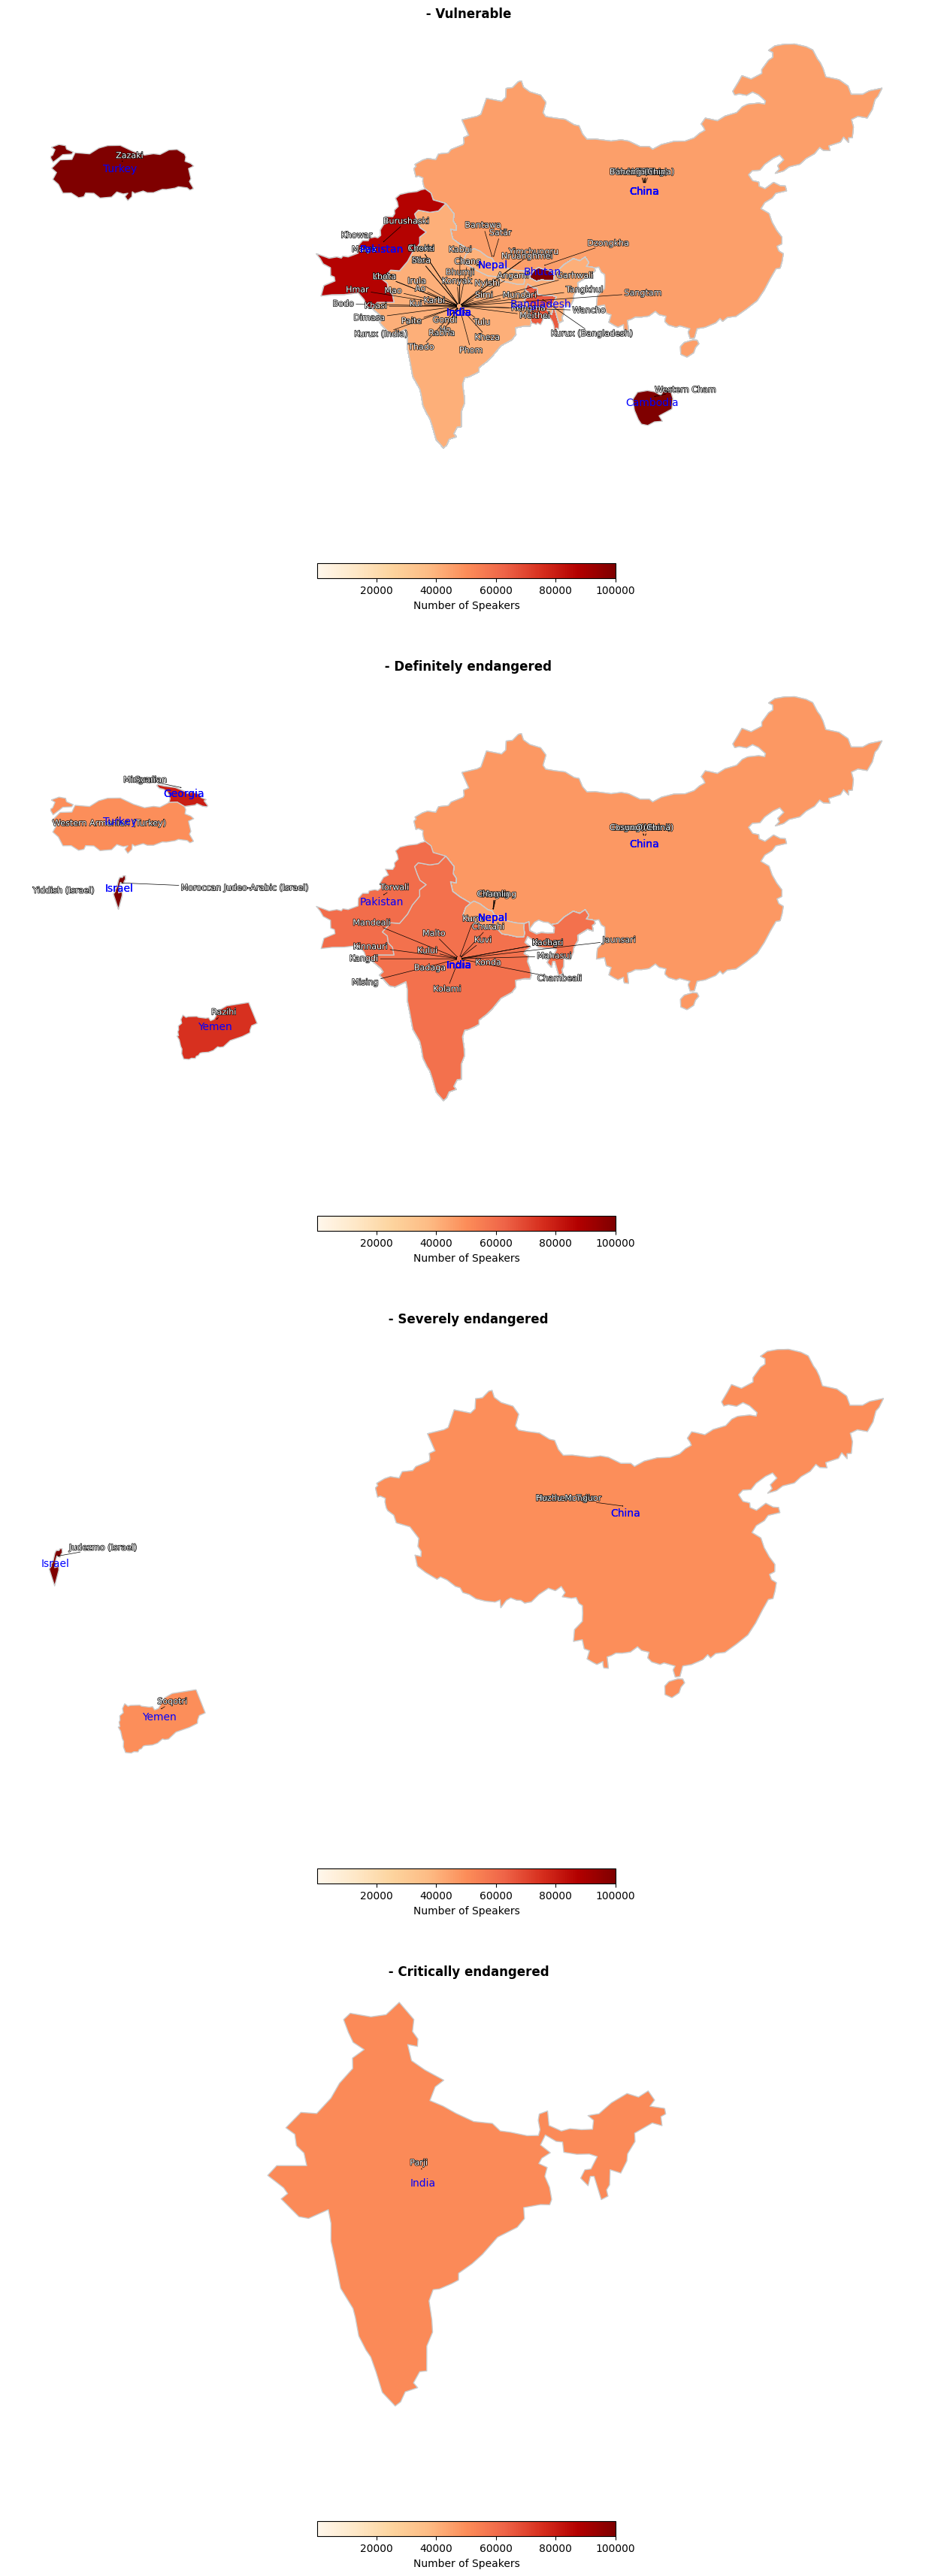

In [215]:
Asia=merged_world_map.loc[(merged_world_map['continent'] == 'Asia')&(merged_world_map['Number of speakers']>40000)]
plot_map(Asia)
plt.tight_layout()
plt.show()

<h3>أفريقيا</h3>


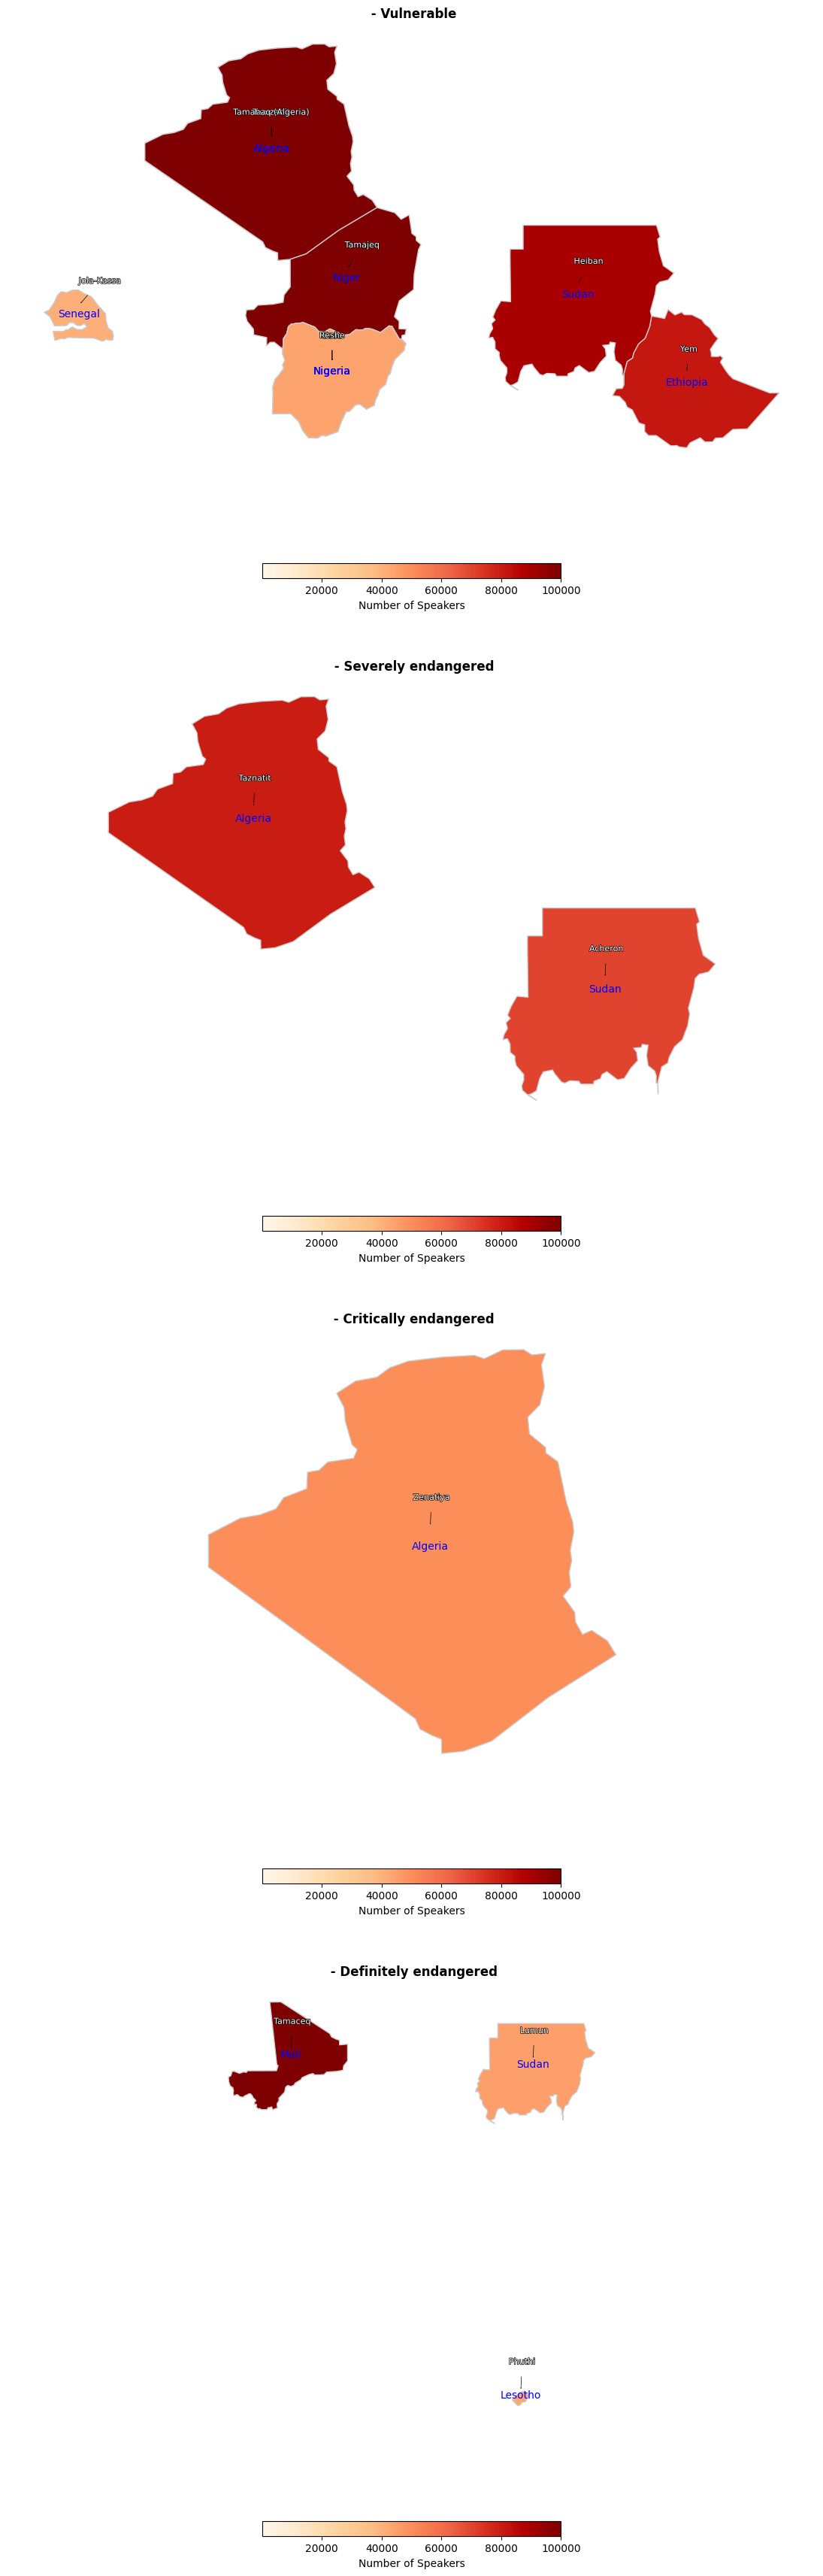

In [210]:
Africa=merged_world_map.loc[(merged_world_map['continent'] == 'Africa')&(merged_world_map['Number of speakers']>40000)]
plot_map(Africa)
plt.tight_layout()
plt.show()

<h3>أوروبا</h3>

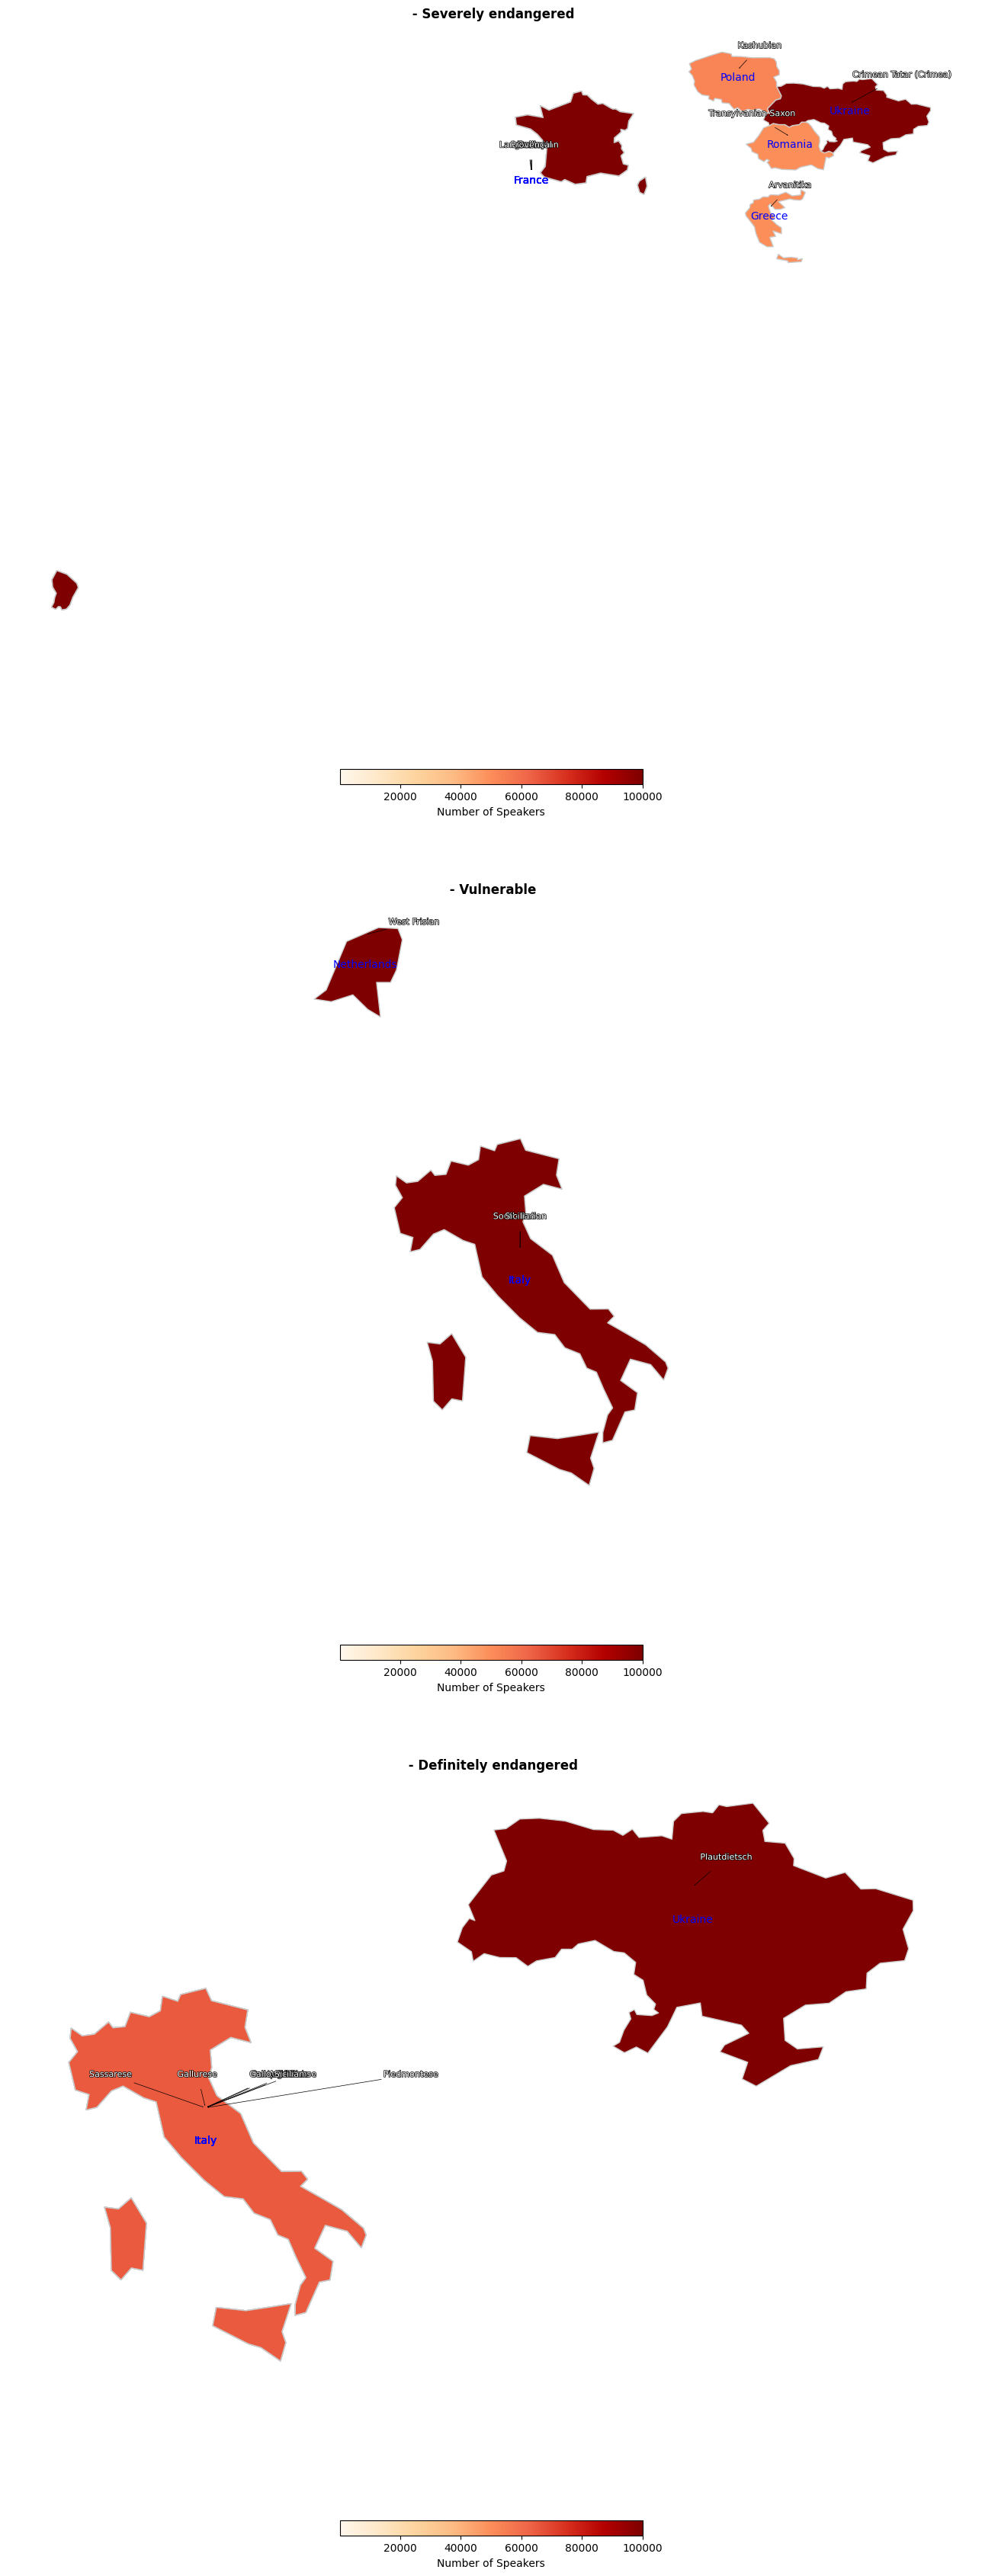

In [211]:
Europe=merged_world_map.loc[(merged_world_map['continent'] == 'Europe')&(merged_world_map['Number of speakers']>40000)]
plot_map(Europe)
plt.tight_layout()
plt.show()

<h3>أمريكا الشمالية</h3>

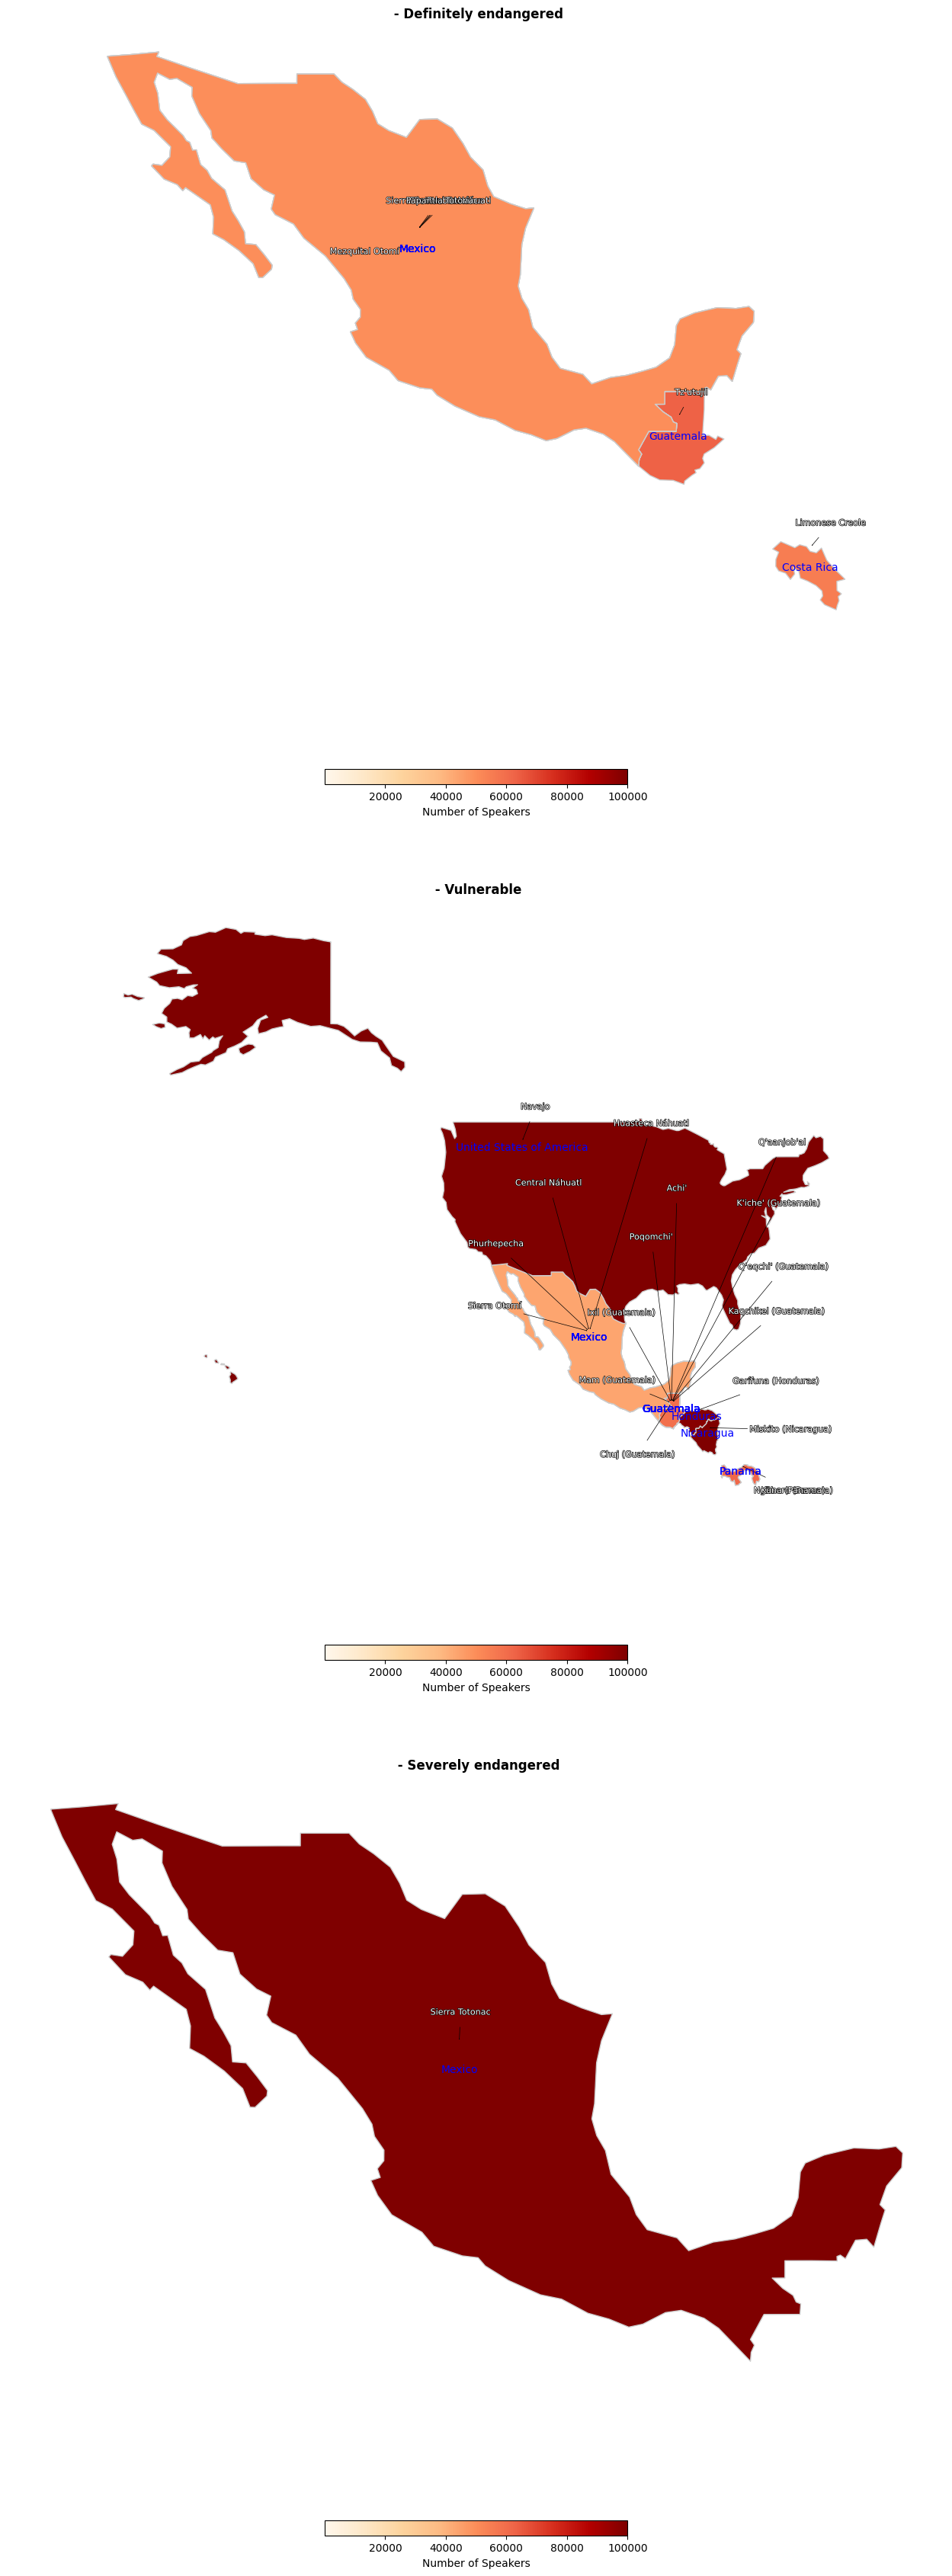

In [212]:
North_America=merged_world_map.loc[(merged_world_map['continent'] == 'North America')&(merged_world_map['Number of speakers']>40000)]
plot_map(North_America)
plt.tight_layout()
plt.show()

<h3>أمريكا الجنوبية</h3>

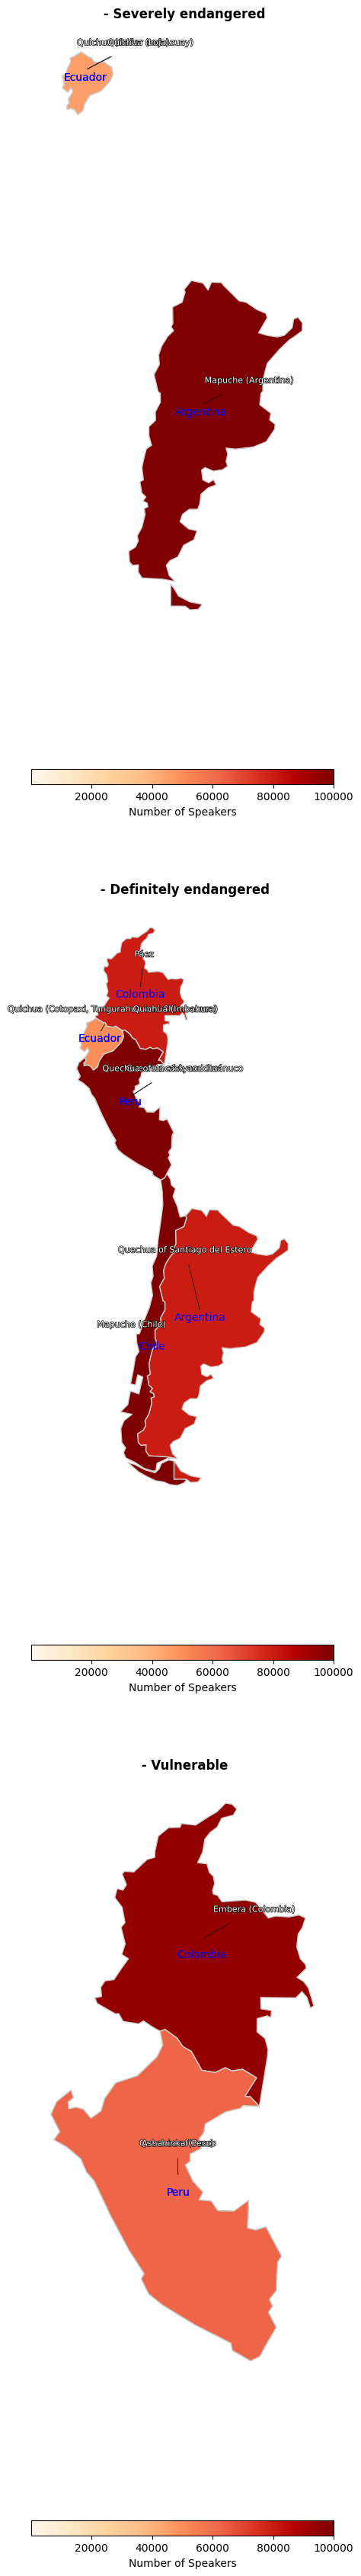

In [213]:
South_America=merged_world_map.loc[(merged_world_map['continent'] == 'South America')&(merged_world_map['Number of speakers']>40000)]
plot_map(South_America)
plt.tight_layout()
plt.show()